<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/01_AR_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AR(p) Î™®Îç∏

- ÎßåÏïΩ **AR(1) Î™®Îç∏**ÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Î©¥ `lags=1`Î°ú ÏÑ§Ï†ï  
  ```python
  model = AutoReg(train["Close"], lags=1)


# ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°Î∞©Î≤ï
* Ï†ÑÏ≤¥(Full series)
* Í≥†Ï†ï ÏõêÏ†ê(=Ï†ïÏ†Å ÌååÎùºÎØ∏ÌÑ∞) ÏòàÏ∏°
* Î°§ÎßÅ ÏúàÎèÑÏö∞(Rolling window)
* ÌôïÏû• ÏúàÎèÑÏö∞(Expanding window)




# Ï∂îÍ∞Ä ÌåÅ

* **Î†àÎ≤®(Í∞ÄÍ≤©)**Î≥¥Îã§ **Ï∞®Î∂Ñ/ÏàòÏùµÎ•†**Ïóê AR(p)ÏùÑ Ïì∞Î©¥ ÏïàÏ†ïÏ†ÅÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏäµÎãàÎã§.
* Î©ÄÌã∞Ïä§ÌÖù ÏòàÏ∏°ÏùÄ

  * **Ïû¨Í∑Ä(recursive)**: 1Ïä§ÌÖù Î™®Îç∏Î°ú Ïó¨Îü¨ Ïä§ÌÖùÏùÑ ÏàúÏ∞® ÏòàÏ∏°(ÏßÄÍ∏à ÏΩîÎìú)
  * **ÏßÅÏ†ë(direct)**: Í∞Å horizonÎßàÎã§ Î≥ÑÎèÑ Î™®Îç∏ ÌïôÏäµ
  * **DirRec/MLP Îì± ÌòºÌï©** Î∞©ÏãùÎèÑ ÏûàÏäµÎãàÎã§.



# Ï†ÑÏ≤¥(Full series)

Ìïú Î≤àÏóê **Ï†ÑÏ≤¥ Íµ¨Í∞Ñ**(1‚Äì10)ÏúºÎ°ú ÌïôÏäµÌïòÍ≥†, Îã§Ïùå ÏãúÏ†ê(11)ÏùÑ ÏòàÏ∏°.
(ÌèâÍ∞ÄÏö©ÏúºÎ°† Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò ÏúÑÌóò, Ï£ºÎ°ú ÏµúÏ¢Ö Î™®Îç∏ Ï†ÅÌï©Ïóê ÏÇ¨Ïö©)

```
1‚Äî2‚Äî3‚Äî4‚Äî5‚Äî6‚Äî7‚Äî8‚Äî9‚Äî10  ‚Üí  (ÌïôÏäµ)  ‚Üí  ÏòàÏ∏° 11
```

Ï¢ãÏïÑ! ÏïÑÎûòÎäî **Full series(Ï†ÑÏ≤¥ Íµ¨Í∞ÑÏúºÎ°ú Ìïú Î≤à ÌïôÏäµ ‚Üí ÎØ∏Îûò ÏòàÏ∏°)**Ïùò **ÏùòÏÇ¨ÏΩîÎìú**Ïïº.

# Full series ÏùòÏÇ¨ÏΩîÎìú (AR(p), Ïû¨Í∑Ä ÏòàÏ∏°)

```text
ÏûÖÎ†•:
  y[1..T]        # Í¥ÄÏ∏° ÏãúÍ≥ÑÏó¥
  p              # AR Ï∞®Ïàò
  h              # ÏòàÏ∏° horizon (ÎØ∏Îûò hÏä§ÌÖù)

Ï†àÏ∞®:
1) Î™®Îç∏ Ï†ÅÌï©
   Œ∏ ‚Üê AR(p)ÏùÑ y[1..T] Ï†ÑÏ≤¥Î°ú Ï†ÅÌï© (Ïû¨ÌïôÏäµ ÏóÜÏùå)

2) Ïû¨Í∑Ä ÏòàÏ∏° (one-stepÏùÑ hÎ≤à Ïù¥Ïñ¥ÏÑú)
   for k = 1..h:
       # t = T+k ÏãúÏ†ê ÏòàÏ∏°Ïãù
       # Ïã§Ï†úÍ∞í y[..T]ÏôÄ, Ïù¥ÎØ∏ ÏòàÏ∏°Ìïú yÃÇ[T+1..T+k-1]ÏùÑ ÏÑûÏñ¥ÏÑú ÏÇ¨Ïö©
       yÃÇ[T+k] ‚Üê œÜ0
                 + Œ£_{i=1..p} œÜ_i * Z[T+k-i]
       Ïó¨Í∏∞ÏÑú Z[t] = {
         y[t]      if t ‚â§ T     (Í≥ºÍ±∞ Í¥ÄÏ∏°Ïπò)
         yÃÇ[t]     if t >  T     (ÏßÅÏ†Ñ Ïä§ÌÖù ÏòàÏ∏°Ïπò)
       }

3) Ï∂úÎ†•
   Î∞òÌôò: (yÃÇ[T+1], yÃÇ[T+2], ..., yÃÇ[T+h])
```

* ÌäπÏßï: **Ï†ÑÏ≤¥ ÌëúÎ≥∏**Î°ú **Ìïú Î≤àÎßå** ÌïôÏäµÌïòÍ≥†(Ï†ïÏ†Å ÌååÎùºÎØ∏ÌÑ∞), Í∑∏ ÏÉÅÌÉúÎ°ú ÎØ∏ÎûòÎ•º **Ïû¨Í∑ÄÏ†ÅÏúºÎ°ú** ÏòàÏ∏°.
* Ï£ºÏùò: ÌèâÍ∞ÄÏö©ÏúºÎ°ú Ïì∞Î©¥ **Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò** ÏúÑÌóò ‚Üí Î≥¥ÌÜµÏùÄ ÏµúÏ¢Ö Î∞∞Ïπò Ï†ÅÌï© ÎòêÎäî Ïö¥ÏòÅ ÏòàÏ∏°Ïóê ÏÇ¨Ïö©.


# Î™®Îç∏-ÏùºÎ∞òÌòï ÏùòÏÇ¨ÏΩîÎìú (AR Ïô∏ Ïñ¥Îñ§ Î™®Îç∏ÏóêÎèÑ)

```text
ÏûÖÎ†•: Îç∞Ïù¥ÌÑ∞ D(=Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ y[1..T] Î∞è ÌïÑÏöîÌïú ÌäπÏßï), horizon h
1) Œ∏ ‚Üê fit(model, D)           # Ï†ÑÏ≤¥Î°ú Ìïú Î≤à ÌïôÏäµ
2) ≈∑[1..h] ‚Üê forecast(Œ∏, h)    # Î™®Îç∏Ïùò ÏòàÏ∏° APIÎ°ú h Ïä§ÌÖù ÏÉùÏÑ±
3) Î∞òÌôò: ≈∑
```

> ÎåÄÎ∂ÄÎ∂ÑÏùò ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî ÏúÑ ‚ÄúÏùºÎ∞òÌòï‚Äù Ìò∏Ï∂úÎ°ú Íµ¨ÌòÑÎêòÎ©∞, AR(p)ÏùÄ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÏúÑÏùò **Ïû¨Í∑Ä Î°úÏßÅ**ÏùÑ ÏàòÌñâÌïúÎã§Í≥† Î≥¥Î©¥ Îèº.


/tmp/ipython-input-1167288979.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30").reset_index()
[*********************100%***********************]  1 of 1 completed


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  938
Model:                    AutoReg(10)   Log Likelihood               -3455.234
Method:               Conditional MLE   S.D. of innovations             10.018
Date:                Mon, 06 Oct 2025   AIC                           6934.468
Time:                        12:11:38   BIC                           6992.464
Sample:                            10   HQIC                          6956.590
                                  938                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8298      1.298      2.180      0.029       0.286       5.374
y.L1           0.9965      0.033     30.567      0.000       0.933       1.060
y.L2           0.0169      0.046      0.367      0.7

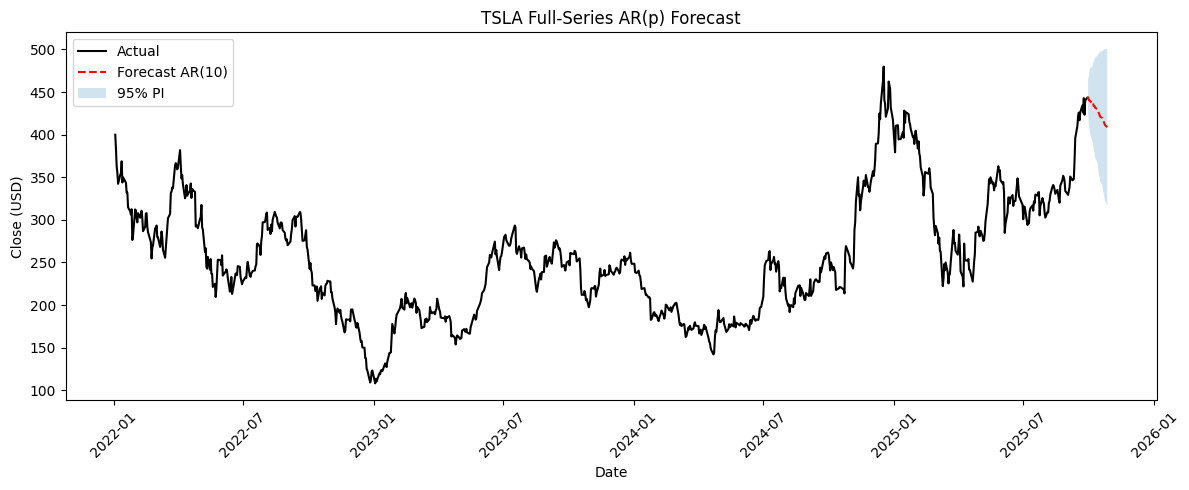

In [6]:
# Full-series AR(p) forecast (no refit, no holdout)
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú (TSLA, ÏµúÍ∑º 3ÎÖÑ)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30").reset_index()
y = df["Close"].to_numpy()
dates = df["Date"].to_numpy()

# 2) AR(p) Ï†ÑÏ≤¥ Íµ¨Í∞Ñ ÌïôÏäµ
p = 10  # Ï∞®Ïàò
fit = AutoReg(y, lags=p, old_names=False).fit()
print(fit.summary())

# 3) ÎØ∏Îûò h Ïä§ÌÖù ÏòàÏ∏°
h = 20  # Ïòà: ÏïûÏúºÎ°ú 20 Í±∞ÎûòÏùº
fc = np.asarray(fit.forecast(steps=h))          # ÏòàÏ∏°Í∞í Î≤°ÌÑ∞
last_day = pd.to_datetime(dates[-1])
fc_dates = pd.bdate_range(last_day + pd.Timedelta(days=1), periods=h)  # ÏòàÏ∏° ÎÇ†Ïßú(ÏòÅÏóÖÏùº Í∏∞Ï§Ä)

# (ÏÑ†ÌÉù) ÏòàÏ∏°Íµ¨Í∞Ñ(confidence interval) ‚Äî statsmodels Î≤ÑÏ†ÑÏóê Îî∞Îùº ÏßÄÏõê
try:
    pred_res = fit.get_prediction(start=len(y), end=len(y) + h - 1)
    ci = pred_res.conf_int(alpha=0.05)  # 95% PI
    ci_lower = ci[:, 0]
    ci_upper = ci[:, 1]
except Exception:
    ci_lower = ci_upper = None

# 4) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,5))
plt.plot(dates, y, label="Actual", color="black")
plt.plot(fc_dates, fc, label=f"Forecast AR({p})", linestyle="--", color="red")
if ci_lower is not None:
    plt.fill_between(fc_dates, ci_lower, ci_upper, alpha=0.2, label="95% PI")
plt.title("TSLA Full-Series AR(p) Forecast")
plt.xlabel("Date"); plt.ylabel("Close (USD)")
plt.xticks(rotation=45); plt.legend(); plt.tight_layout()
plt.show()


# Í≥†Ï†ï ÏõêÏ†ê(=Ï†ïÏ†Å ÌååÎùºÎØ∏ÌÑ∞) ÏòàÏ∏°  

Ï≤´ 80%Î°ú **Ìïú Î≤àÎßå ÌïôÏäµ** ‚Üí Í∑∏ ÌååÎùºÎØ∏ÌÑ∞Î°ú **ÎÇ®ÏùÄ Ï†Ñ Íµ¨Í∞ÑÏùÑ Ïû¨Í∑Ä ÏòàÏ∏°**.
Í≥†Ï†ï ÌïôÏäµÍµ¨Í∞ÑÏúºÎ°ú Ìïú Î≤àÎßå ÌïôÏäµÌïòÍ≥†(Ï≤´ 80%), Í∑∏ ÌååÎùºÎØ∏ÌÑ∞Î•º ÌÖåÏä§Ìä∏ Ï†Ñ Íµ¨Í∞ÑÏóê Í∑∏ÎåÄÎ°ú Ïì∞Îäî** Î∞©ÏãùÏùÄ
* **Í≥†Ï†ï ÏõêÏ†ê ÏòàÏ∏° (Fixed-origin forecast)**
* **Îã®Ïùº ÌôÄÎìúÏïÑÏõÉ(split) ÌèâÍ∞Ä / Ï†ïÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏ (static-parameter, no-refit)**
* (ÏòàÏ∏°ÏùÑ Ìïú Î≤àÏóê Ïó¨Îü¨ Ïä§ÌÖù ÎÇ¥Îã§Î≥¥Îäî ÌòïÌÉúÏù¥ÎØÄÎ°ú) **Í≥†Ï†ï ÏõêÏ†ê Îã§Îã®Í≥Ñ *Ïû¨Í∑Ä* ÏòàÏ∏° (fixed-origin recursive multi-step)**

> ÏöîÏ†ê: **Ïû¨ÌïôÏäµ(refit) ÏóÜÏùå**, ÏõêÏ†ê(origin)ÏùÑ **train ÎÅù ÏãúÏ†ê**Ïóê Í≥†Ï†ïÌï¥ Í∑∏ Ïù¥ÌõÑÎ•º Ï≠â ÏòàÏ∏°.

```
[1‚Äî2‚Äî3‚Äî4‚Äî5‚Äî6‚Äî7‚Äî8] ‚Üí ÏòàÏ∏° 9,10 ‚Ä¶
(Ïû¨ÌïôÏäµ ÏóÜÏùå)
```

**ÏùòÏÇ¨ÏΩîÎìú (AR(p))**

```python
fit = AutoReg(y[:train_end], lags=p).fit()
yhat[train_end:] = fit.predict(start=train_end, end=n-1)  # Í≥†Ï†ï ÏõêÏ†ê, Ïû¨ÌïôÏäµ ÏóÜÏùå
```

* Ïû•Ï†ê: Îπ†Î•¥Í≥† Í∞ÑÎã®, Ïû¨ÌòÑÏÑ± ÎÜíÏùå
* Îã®Ï†ê: **ÎìúÎ¶¨ÌîÑÌä∏Ïóê ÎëîÍ∞ê**, Î©ÄÎ¶¨ Í∞àÏàòÎ°ù Ïò§Ï∞® ÎàÑÏ†Å(Ïû¨Í∑Ä Îã§Îã®Í≥Ñ)


/tmp/ipython-input-2433316129.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed


üìå Training MSE: 82.3140, R¬≤: 0.9762
üìå Test MSE: 5125.8919, R¬≤: -0.7349


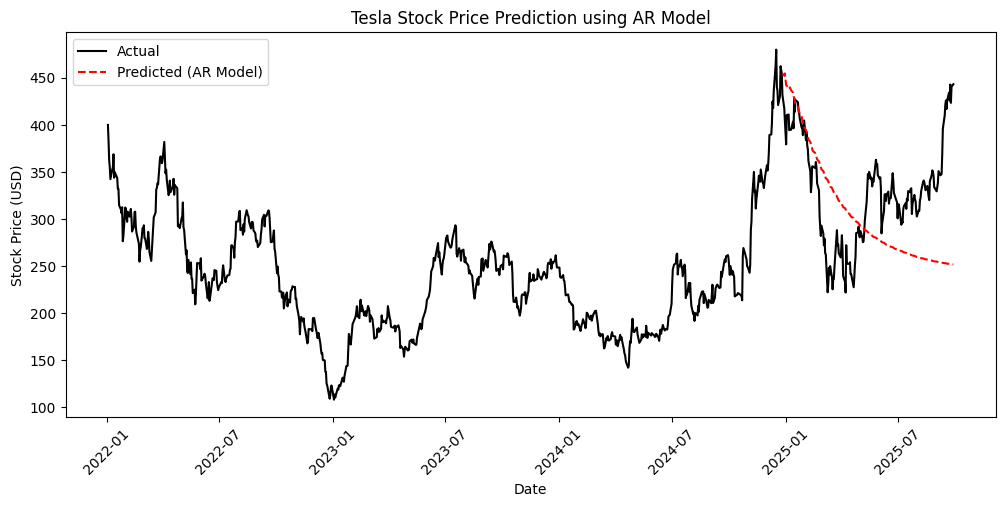

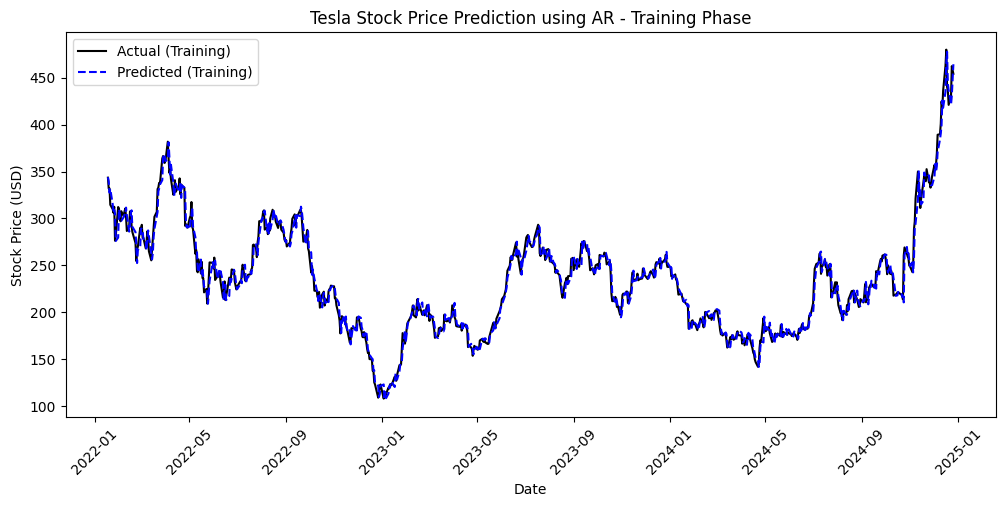

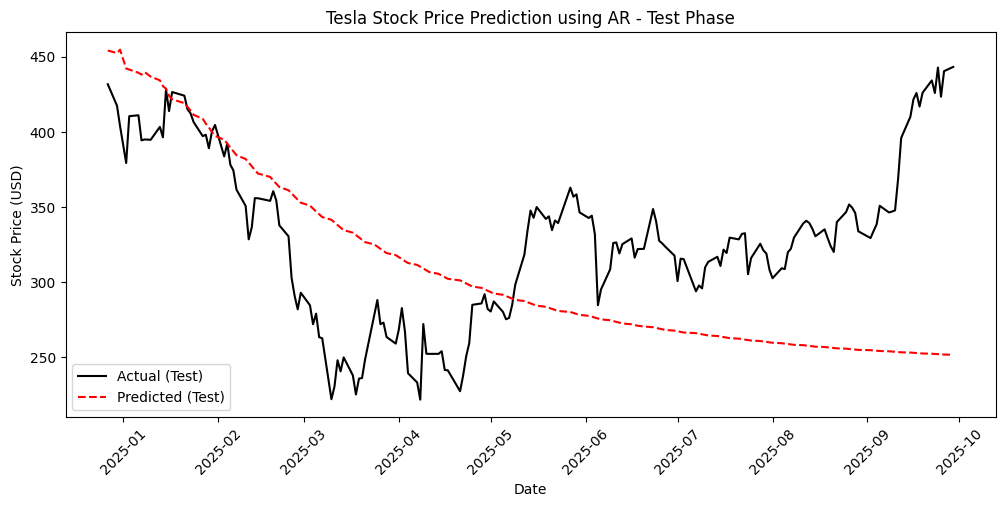

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, r2_score

# üìå 1Ô∏è‚É£ ÌÖåÏä¨Îùº(TSLA) Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (ÏµúÍ∑º 3ÎÖÑÏπò)
df = yf.download("TSLA", start="2022-01-01", end="2025-09-30")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
df = df.reset_index()

# üìå 2Ô∏è‚É£ Feature ÏÉùÏÑ±: ÎÇ†ÏßúÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
df["Day"] = np.arange(len(df))

# üìå 3Ô∏è‚É£ ÏûÖÎ†• Î≥ÄÏàò(X) Î∞è Ï∂úÎ†• Î≥ÄÏàò(y) Ï†ïÏùò
X = df[["Day"]].values  # ÎÇ†ÏßúÎ•º ÏûÖÎ†• Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©
y = df["Close"].values  # Ï¢ÖÍ∞Ä(Close)Î•º ÏòàÏ∏°Ìï† Î™©Ìëú Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©

# üìå 4Ô∏è‚É£ ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# üìå 5Ô∏è‚É£ AR(ÏûêÎèôÌöåÍ∑Ä) Î™®Îç∏ ÌïôÏäµ
lag = 10  # AR Î™®Îç∏Ïùò ÏãúÏ∞® ÏÑ§Ï†ï
model = AutoReg(train["Close"], lags=lag)
model_fit = model.fit()

# üìå 6Ô∏è‚É£ ÏòàÏ∏° ÏàòÌñâ
train_pred = model_fit.predict(start=lag, end=len(train) - 1)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_pred = model_fit.predict(start=len(train), end=len(df) - 1)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°

# üìå 7Ô∏è‚É£ ÏÑ±Îä• ÌèâÍ∞Ä
train_mse = mean_squared_error(train["Close"][lag:], train_pred)
test_mse = mean_squared_error(test["Close"], test_pred)
train_r2 = r2_score(train["Close"][lag:], train_pred)
test_r2 = r2_score(test["Close"], test_pred)

print(f"üìå Training MSE: {train_mse:.4f}, R¬≤: {train_r2:.4f}")
print(f"üìå Test MSE: {test_mse:.4f}, R¬≤: {test_r2:.4f}")

# üìå 8Ô∏è‚É£ Í≤∞Í≥º ÏãúÍ∞ÅÌôî (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (AR Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using AR Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# üìå 9Ô∏è‚É£ Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° vs Ïã§Ï†úÍ∞í)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][lag:], train["Close"][lag:], label="Actual (Training)", color="black")
plt.plot(train["Date"][lag:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using AR - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# üìå üîü Í≤∞Í≥º ÏãúÍ∞ÅÌôî (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° vs Ïã§Ï†úÍ∞í)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test["Close"], label="Actual (Test)", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using AR - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Î°§ÎßÅ ÏúàÎèÑÏö∞(Rolling window)

Í≥†Ï†ï Í∏∏Ïù¥ WÎ°ú **ÏµúÍ∑º WÍ∞úÎßå** Îß§ ÏãúÏ†ê Ïû¨ÌïôÏäµ ‚Üí 1Ïä§ÌÖù Ïïû ÏòàÏ∏°.

```
[1 2 3] ‚Üí 4
 [2 3 4] ‚Üí 5
  [3 4 5] ‚Üí 6
   ...
```

* Ïû•Ï†ê: **Î≥ÄÌôî Ï†ÅÏùë Îπ†Î¶Ñ**
* Îã®Ï†ê: Ïò§ÎûòÎêú Ï†ïÎ≥¥ ÌèêÍ∏∞(Îç∞Ïù¥ÌÑ∞ ÎÇ≠ÎπÑ Í∞ÄÎä•)

**ÏùòÏÇ¨ÏΩîÎìú**

```python
for t in range(train_end, n):
    fit = AutoReg(y[t-W:t], lags=p).fit()
    yhat[t] = fit.forecast(1)[0]
```



[Rolling AR(10)] Test RMSE=13.3715, R¬≤=0.9395


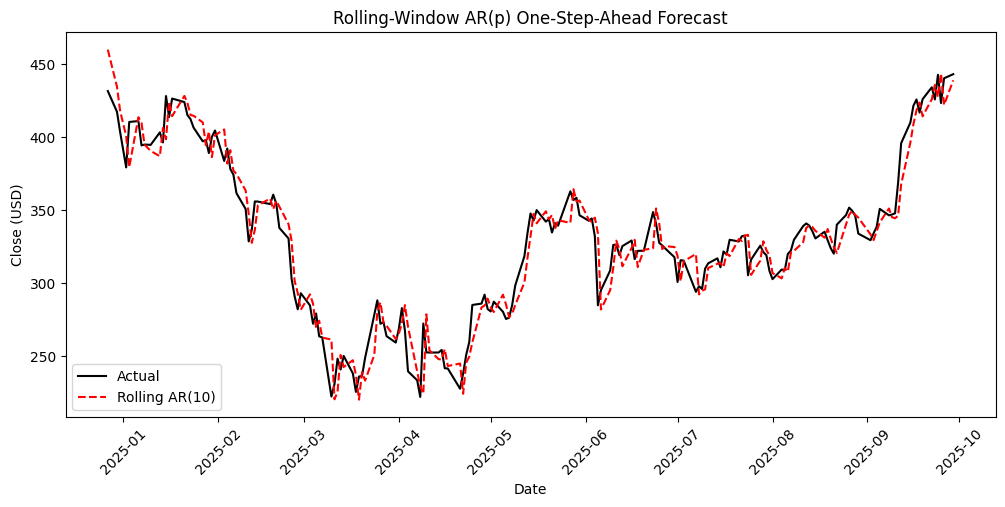

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, r2_score

y = df["Close"].to_numpy()
dates = df["Date"].to_numpy()
train_size = int(len(y) * 0.8)

p = 10       # AR Ï∞®Ïàò
W = 252      # Î°§ÎßÅ ÏúàÎèÑÏö∞ Í∏∏Ïù¥(Ïòà: 1ÎÖÑ Í±∞ÎûòÏùº)
preds = []

for t in range(train_size, len(y)):
    start_idx = max(0, t - W)
    y_win = y[start_idx:t]           # t-1ÍπåÏßÄ ÏÇ¨Ïö©
    if y_win.shape[0] <= p:
        preds.append(np.nan)
        continue

    fit = AutoReg(y_win, lags=p, old_names=False).fit()
    yhat = fit.forecast(steps=1).item()  # ‚Üê Ïä§ÏπºÎùºÎ°ú Ï∂îÏ∂ú(Deprecation ÌöåÌîº)
    preds.append(yhat)

actual = y[train_size:]
preds = np.asarray(preds)

mask = ~np.isnan(preds)
mse  = mean_squared_error(actual[mask], preds[mask])  # squared Ïù∏Ïûê X
rmse = np.sqrt(mse)                                   # ÏßÅÏ†ë sqrt
r2   = r2_score(actual[mask], preds[mask])
print(f"[Rolling AR({p})] Test RMSE={rmse:.4f}, R¬≤={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(dates[train_size:], actual, label="Actual", color="black")
plt.plot(dates[train_size:], preds, label=f"Rolling AR({p})", linestyle="--", color="red")
plt.title("Rolling-Window AR(p) One-Step-Ahead Forecast")
plt.xlabel("Date"); plt.ylabel("Close (USD)")
plt.xticks(rotation=45); plt.legend(); plt.show()


# ÌôïÏû• ÏúàÎèÑÏö∞(Expanding window)

ÏãúÏûë Íµ¨Í∞ÑÏóêÏÑú Ï∂úÎ∞úÌï¥ **Ï≤òÏùåÎ∂ÄÌÑ∞ t‚àí1ÍπåÏßÄ Ï†ÑÎ∂Ä**Î°ú Îß§ ÏãúÏ†ê Ïû¨ÌïôÏäµ ‚Üí 1Ïä§ÌÖù Ïïû ÏòàÏ∏°.

```
[1 2 3] ‚Üí 4
[1 2 3 4] ‚Üí 5
[1 2 3 4 5] ‚Üí 6
   ...
```

* Ïû•Ï†ê: **Îç∞Ïù¥ÌÑ∞ Ï∂ïÏ†Å ‚Üí ÏïàÏ†ïÏ†Å**
* Îã®Ï†ê: **ÏµúÍ∑º Î≥ÄÌôî Ï†ÅÏùëÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎäêÎ¶º**, Í≥ÑÏÇ∞Îüâ Ï¶ùÍ∞Ä

**ÏùòÏÇ¨ÏΩîÎìú**

```python
for t in range(train_end, n):
    fit = AutoReg(y[:t], lags=p).fit()
    yhat[t] = fit.forecast(1)[0]
```

[Expanding AR(10)] Test RMSE=13.2619, R¬≤=0.9405


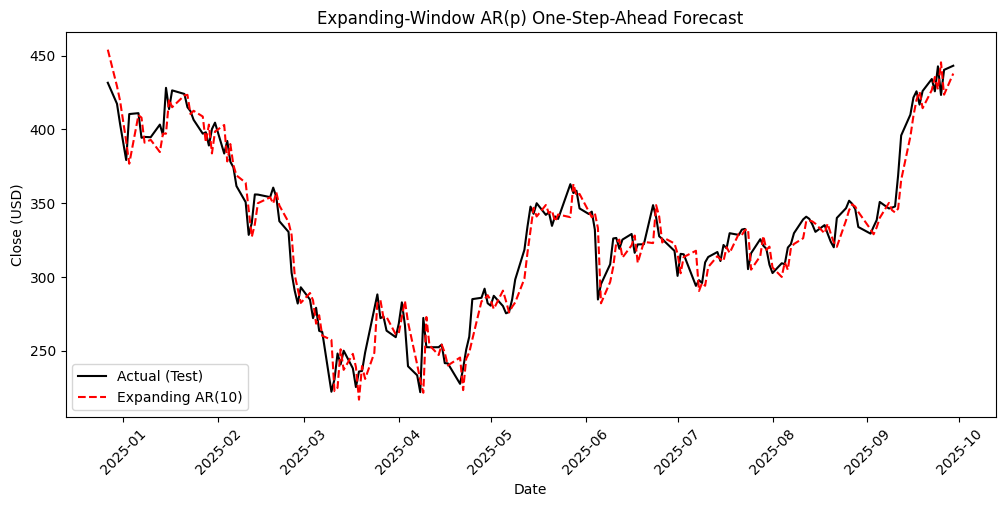

In [5]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

p = 10
preds_exp = []

actual = y[train_size:]                  # ÌÖåÏä§Ìä∏ Ïã§Ï†úÍ∞í

for t in range(train_size, len(y)):
    y_win = y[:t]                         # ÏãúÏûë~t-1ÍπåÏßÄ Î™®Îëê ÏÇ¨Ïö©
    if y_win.shape[0] <= p:
        preds_exp.append(np.nan)
        continue

    fit = AutoReg(y_win, lags=p, old_names=False).fit()
    # üîß Ïä§ÏπºÎùºÎ°ú ÏïàÏ†ÑÌïòÍ≤å Ï∂îÏ∂ú (Î∞∞Ïó¥/ÏãúÎ¶¨Ï¶à ÎåÄÏùë)
    yhat = float(np.asarray(fit.forecast(steps=1)).ravel()[0])
    preds_exp.append(yhat)

preds_exp = np.asarray(preds_exp, dtype=float)
mask = ~np.isnan(preds_exp)

# üîß squared=False ÎåÄÏã† ÏßÅÏ†ë sqrt
mse_exp  = mean_squared_error(actual[mask], preds_exp[mask])
rmse_exp = np.sqrt(mse_exp)
r2_exp   = r2_score(actual[mask], preds_exp[mask])
print(f"[Expanding AR({p})] Test RMSE={rmse_exp:.4f}, R¬≤={r2_exp:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,5))
plt.plot(df["Date"].to_numpy()[train_size:], actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].to_numpy()[train_size:], preds_exp, label=f"Expanding AR({p})", linestyle="--", color="red")
plt.title("Expanding-Window AR(p) One-Step-Ahead Forecast")
plt.xlabel("Date"); plt.ylabel("Close (USD)")
plt.xticks(rotation=45); plt.legend(); plt.show()
